In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

import os, os.path
import json 
import math 
import statistics
import utm
import numpy as np
import pandas as pd 
from pandas.io.json import json_normalize
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2
import rasterio as rs
from rasterio.plot import show, show_hist
from rasterio.mask import mask
from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio.merge import merge

In [7]:
import sys
sys.path.append('../')
from src import utils 

## Vineyard input image and label distribution visulization 

In [9]:
img_dir   = '/data2/hkaman/Hyper'
label_dir = '/data2/hkaman/Livingston/LIV_tif/LIV2019/yield'

block_full_dict = utils.hyperspectral_label_mtx_gen(img_dir, label_dir, spatial_resolution = 14.5).block_image_label_gen()
df = utils.dataframe_split_csv_gen(block_full_dict, img_size = 8, offset = 2, cultivar_list = None).hyper_df_csv()
df

,block,X,Y,year,cultivar_id,cultivar,trellis,trellis_id,row,space,patch_mean
0,LIV_003_2019,0,34,2019,7,MALVASIA_BIANCA,4WIREWO,1,12,7,8.810658
1,LIV_003_2019,0,36,2019,7,MALVASIA_BIANCA,4WIREWO,1,12,7,8.818236
2,LIV_003_2019,0,38,2019,7,MALVASIA_BIANCA,4WIREWO,1,12,7,8.876853
3,LIV_003_2019,0,40,2019,7,MALVASIA_BIANCA,4WIREWO,1,12,7,8.922078
4,LIV_003_2019,0,42,2019,7,MALVASIA_BIANCA,4WIREWO,1,12,7,8.993444
...,...,...,...,...,...,...,...,...,...,...,...
8681,LIV_186_2019,28,38,2019,13,RIESLING,SPLIT,2,11,7,16.536495
8682,LIV_186_2019,28,40,2019,13,RIESLING,SPLIT,2,11,7,16.069435
8683,LIV_186_2019,28,42,2019,13,RIESLING,SPLIT,2,11,7,15.806927
8684,LIV_186_2019,28,44,2019,13,RIESLING,SPLIT,2,11,7,15.655951


### By Cultivar

#### 'MALVASIA_BIANCA'

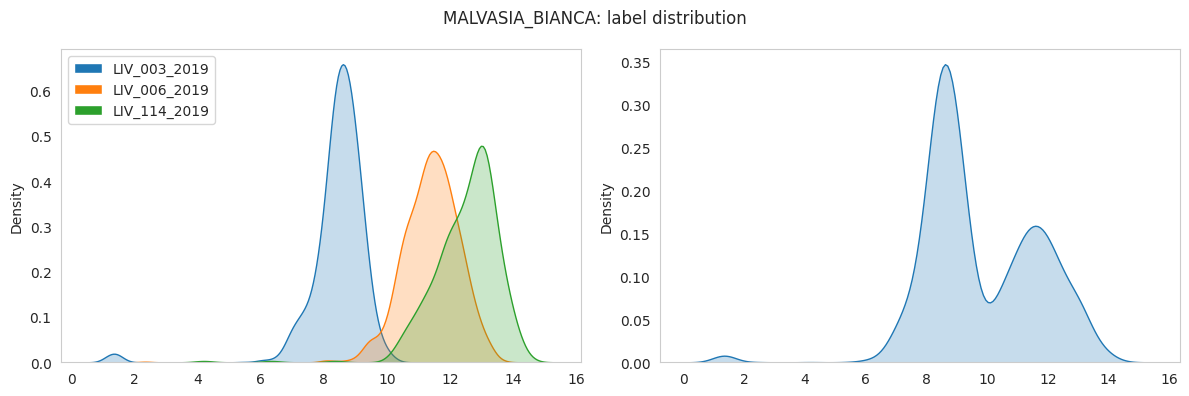

In [90]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['MALVASIA_BIANCA']).by_cultivar_label_dist_vis()

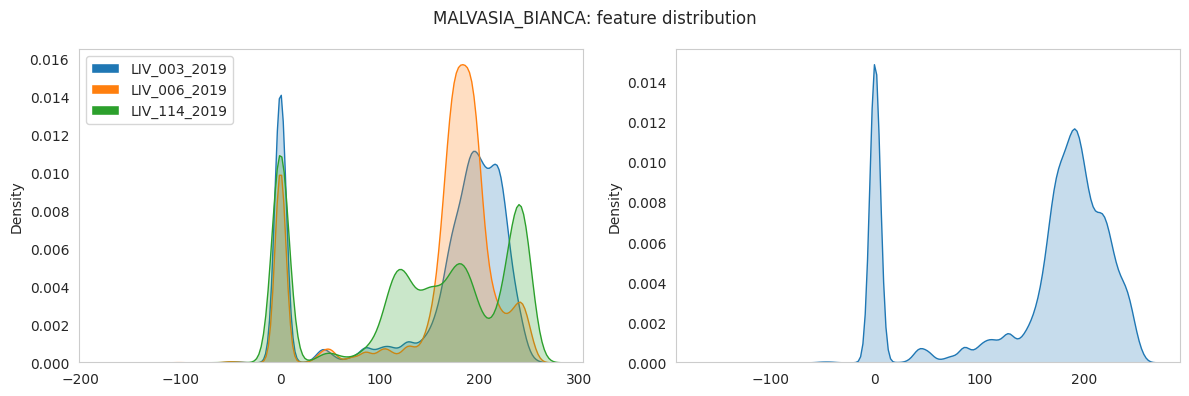

In [91]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['MALVASIA_BIANCA']).by_cultivar_image_dist_vis()

#### 'MUSCAT_OF_ALEXANDRIA'

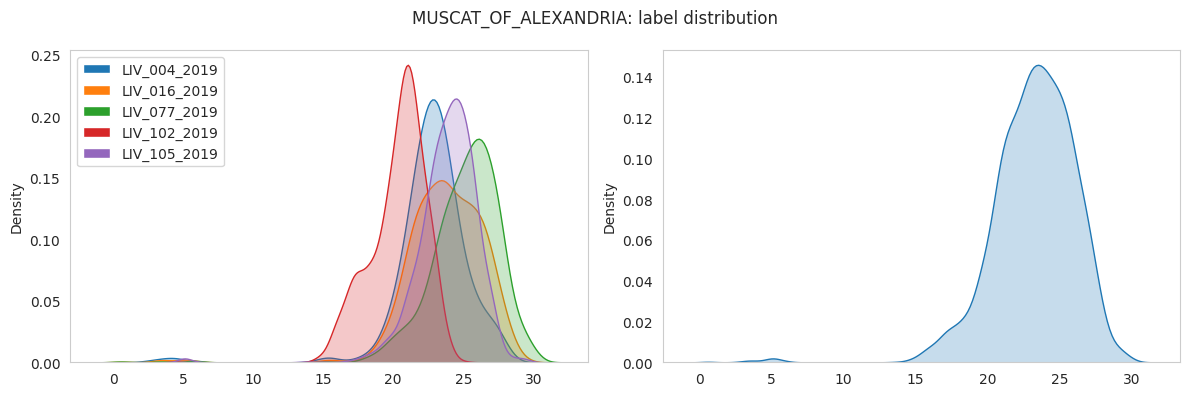

In [92]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['MUSCAT_OF_ALEXANDRIA']).by_cultivar_label_dist_vis()

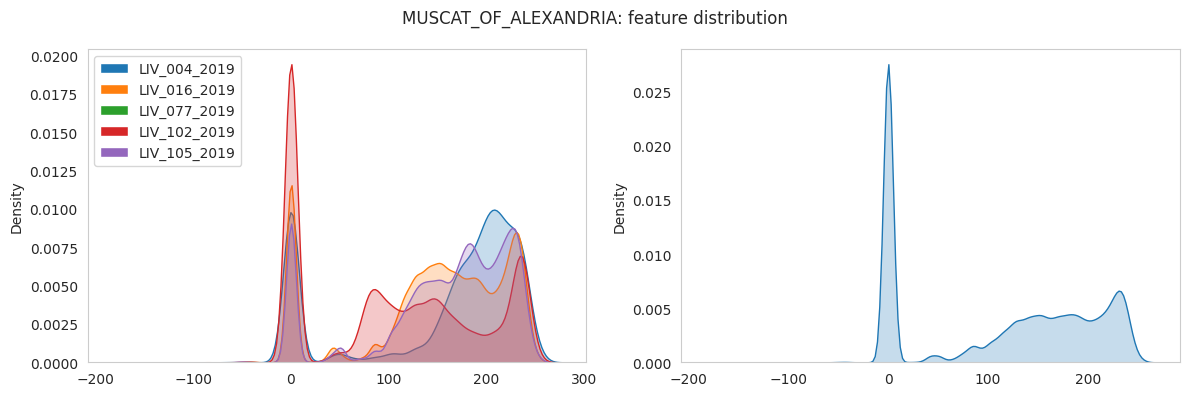

In [93]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['MUSCAT_OF_ALEXANDRIA']).by_cultivar_image_dist_vis()

#### 'SYMPHONY'

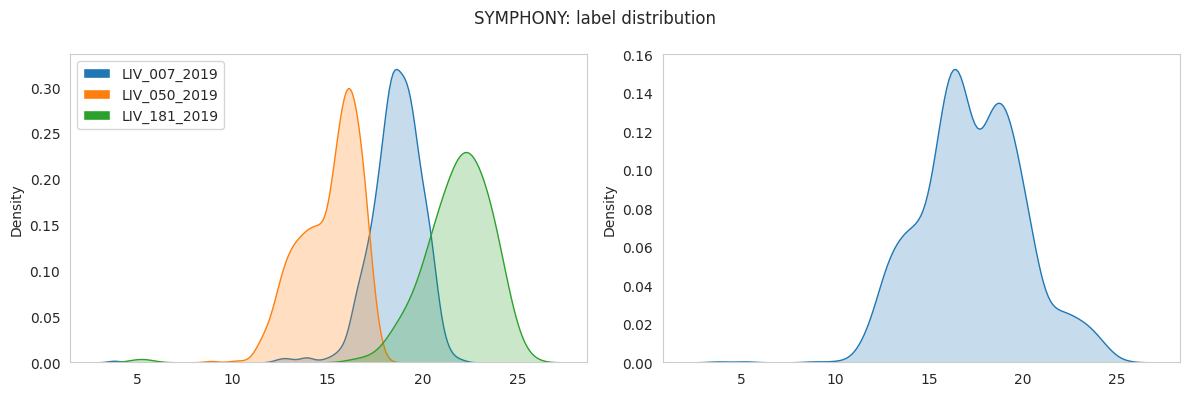

In [94]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['SYMPHONY']).by_cultivar_label_dist_vis()

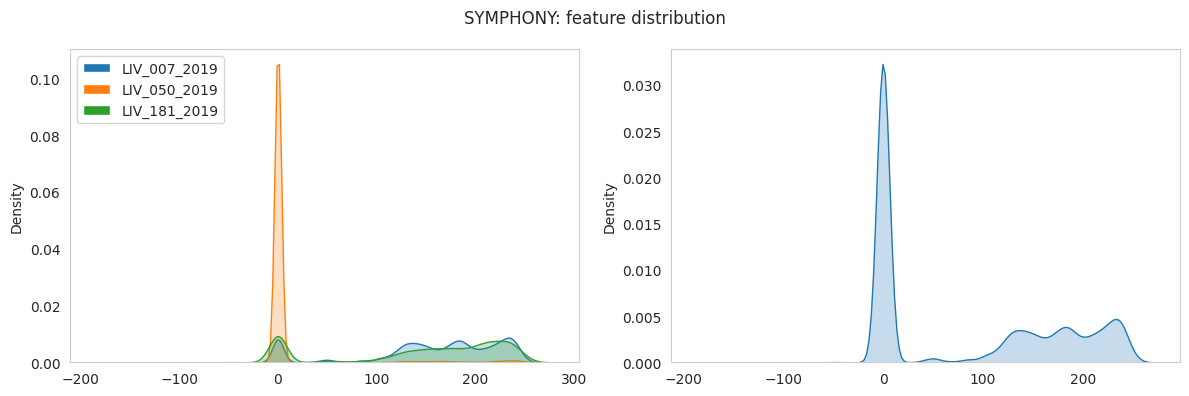

In [95]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['SYMPHONY']).by_cultivar_image_dist_vis()

#### 'PINOT_GRIS'

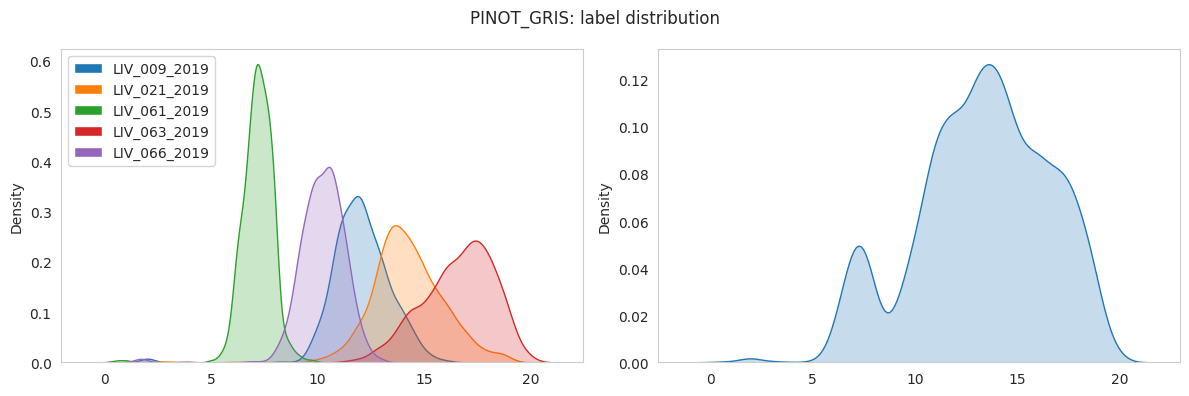

In [96]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['PINOT_GRIS']).by_cultivar_label_dist_vis()

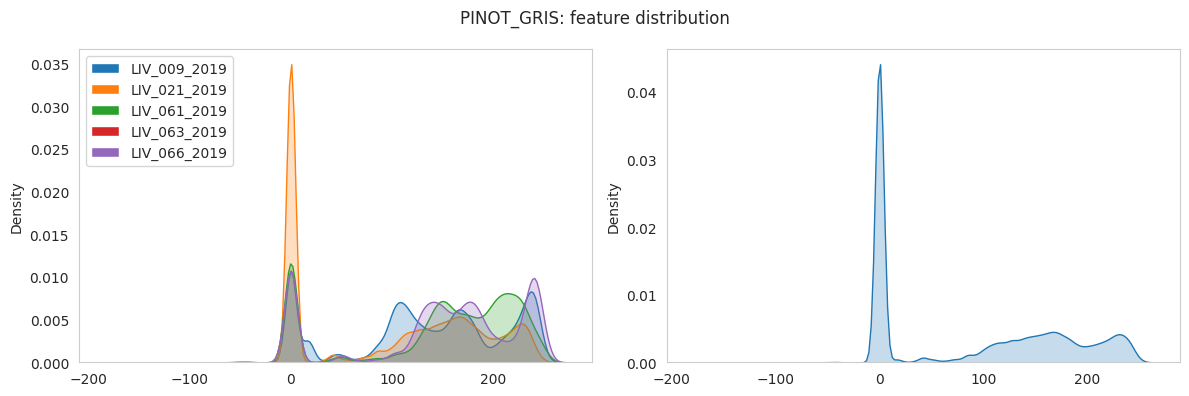

In [97]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['PINOT_GRIS']).by_cultivar_image_dist_vis()

#### 'CHARDONNAY'

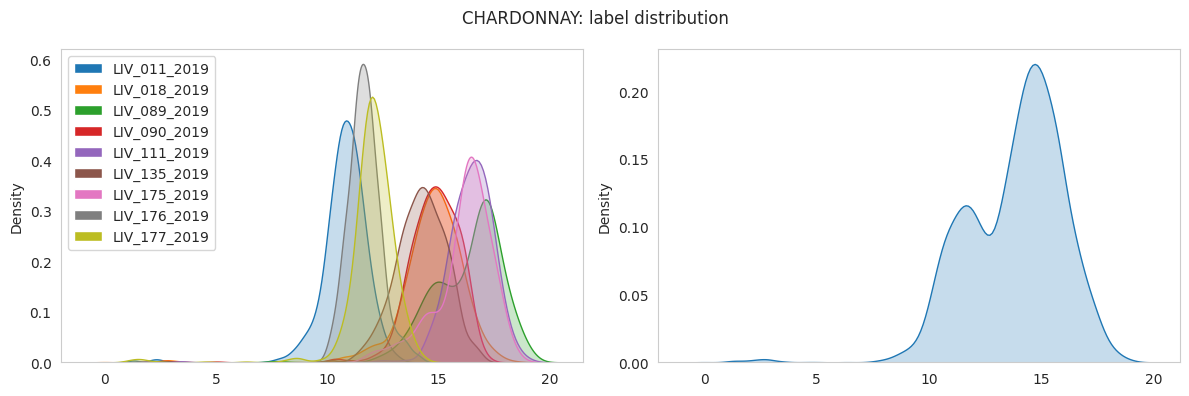

In [98]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['CHARDONNAY']).by_cultivar_label_dist_vis()

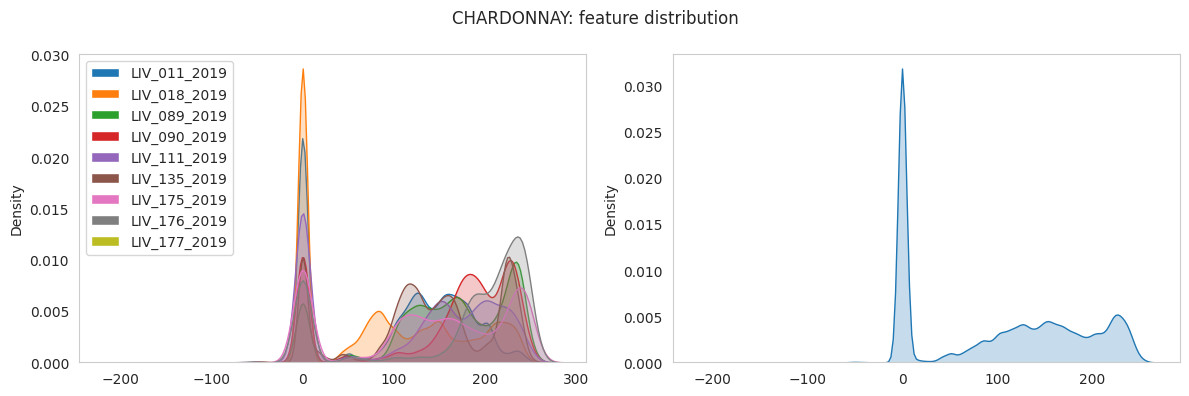

In [99]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['CHARDONNAY']).by_cultivar_image_dist_vis()

#### 'SYRAH'

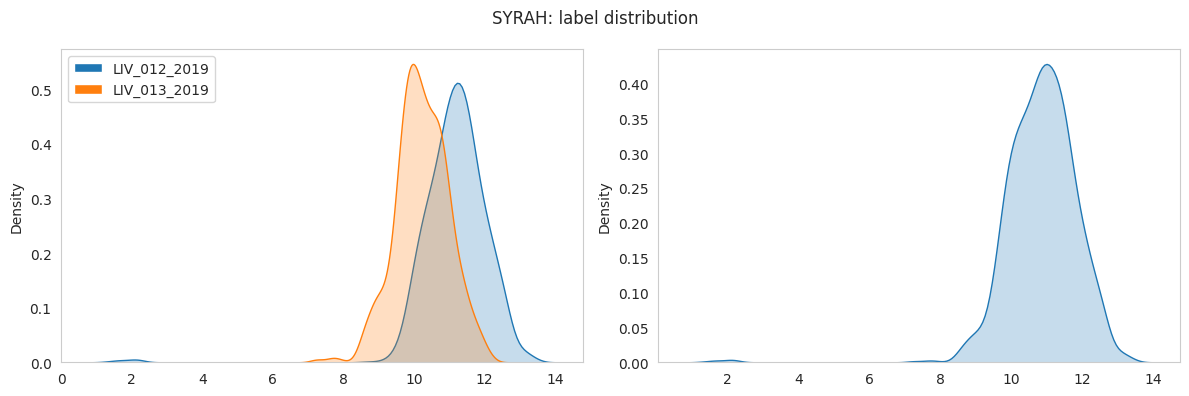

In [100]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['SYRAH']).by_cultivar_label_dist_vis()

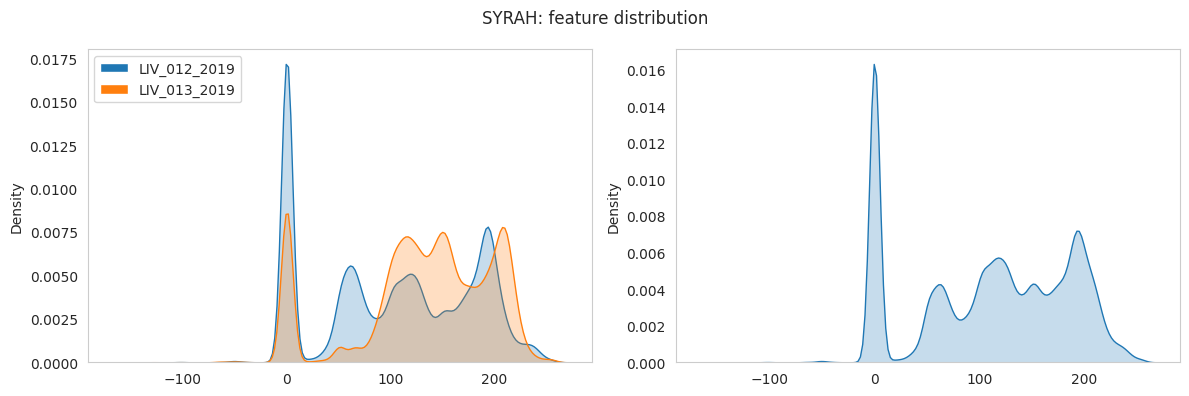

In [101]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['SYRAH']).by_cultivar_image_dist_vis()

#### 'RIESLING'

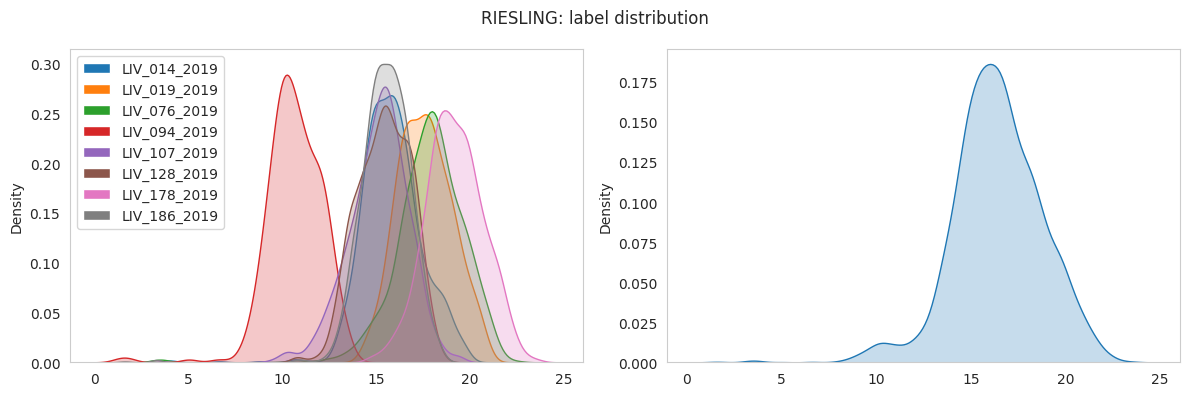

In [102]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['RIESLING']).by_cultivar_label_dist_vis()

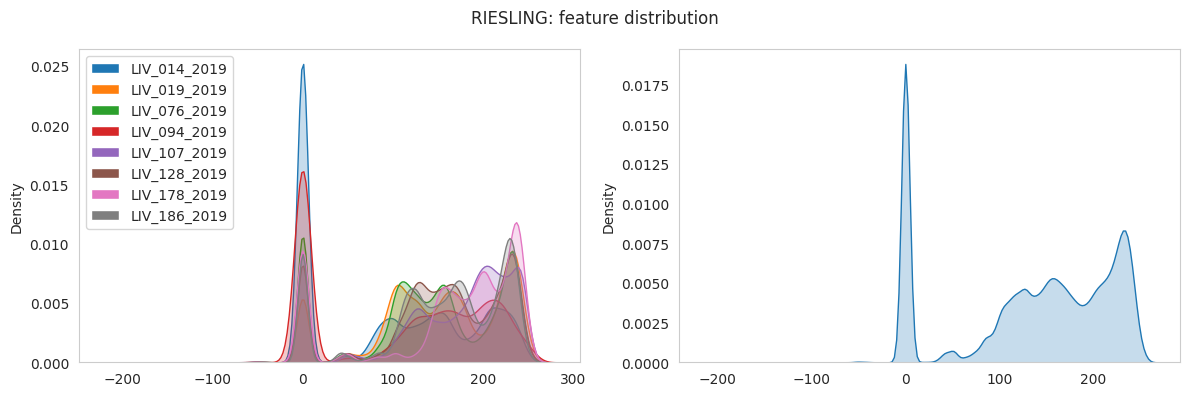

In [103]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['RIESLING']).by_cultivar_image_dist_vis()

#### 'CABERNET_SAUVIGNON'

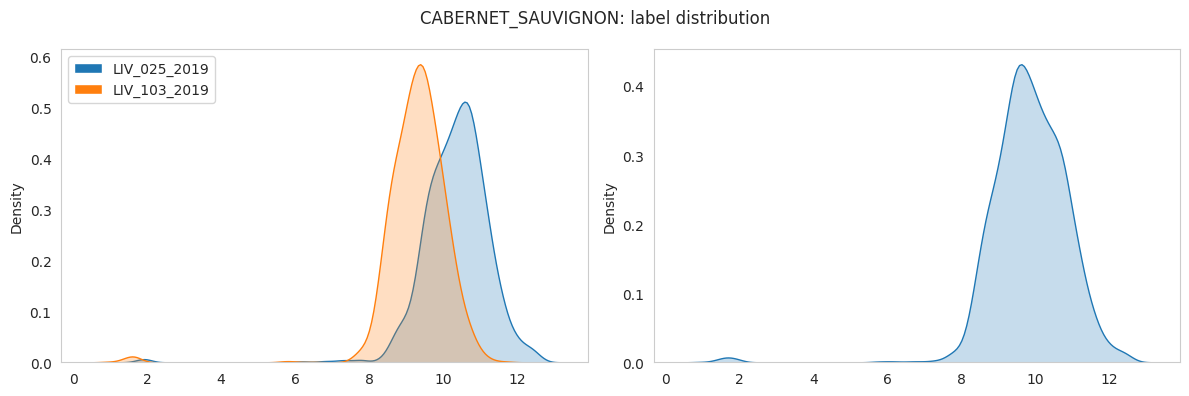

In [104]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['CABERNET_SAUVIGNON']).by_cultivar_label_dist_vis()

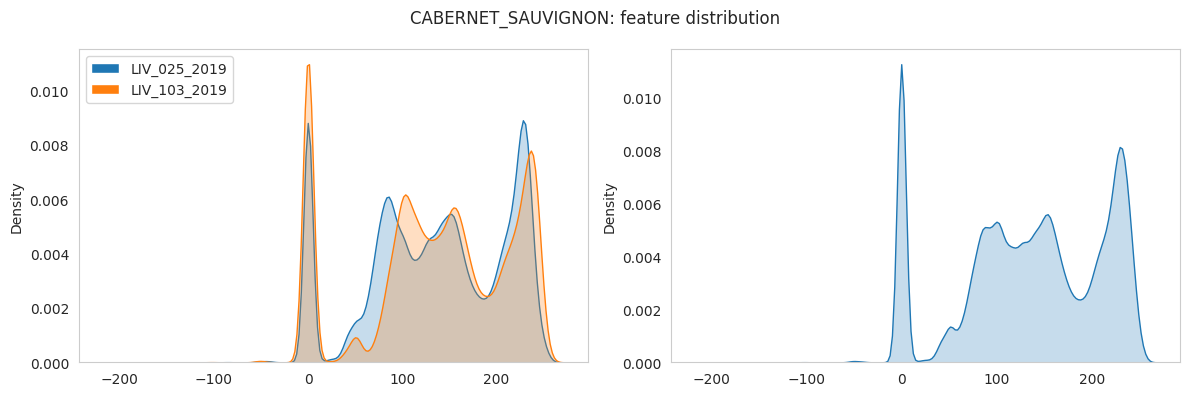

In [105]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = ['CABERNET_SAUVIGNON']).by_cultivar_image_dist_vis()

### All Cultivar 

In [106]:
cultivars = ['MALVASIA_BIANCA', 'MUSCAT_OF_ALEXANDRIA', 'SYMPHONY',
       'PINOT_GRIS', 'CHARDONNAY', 'SYRAH', 'RIESLING',
       'CABERNET_SAUVIGNON']

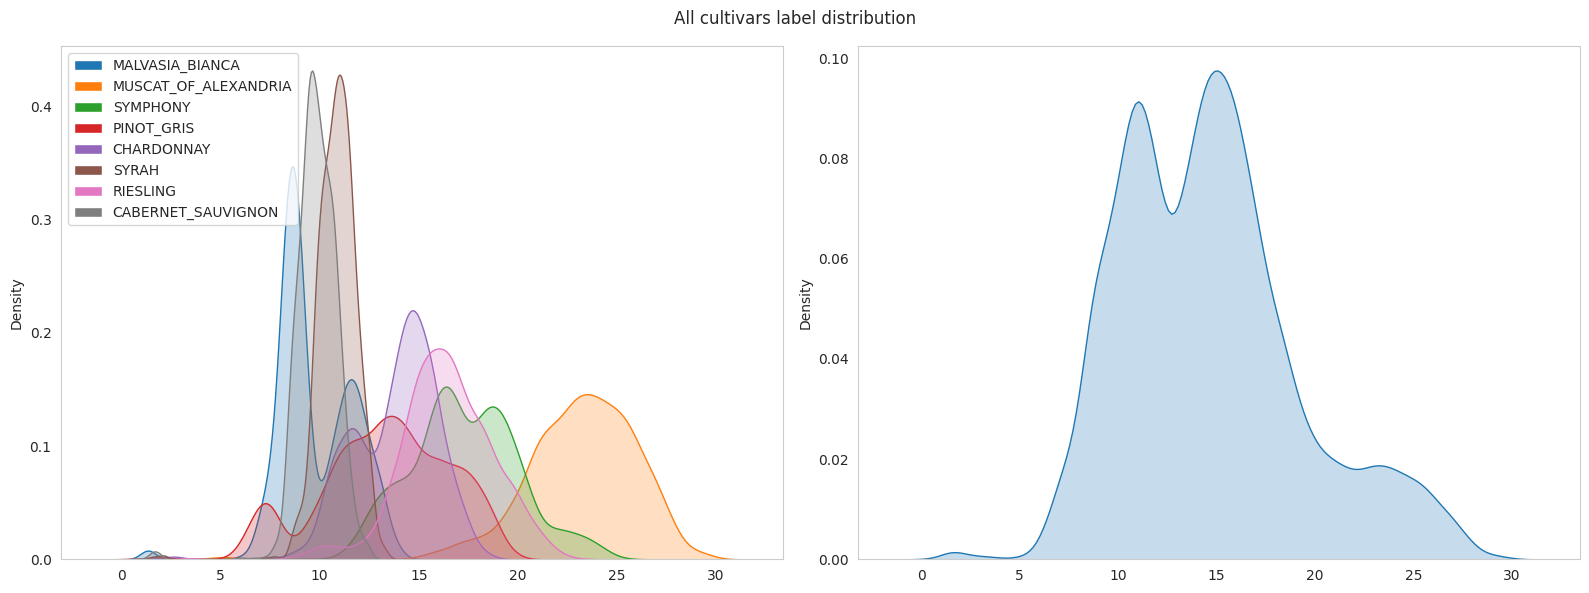

In [109]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = cultivars).all_cultivar_label_dist_vis()

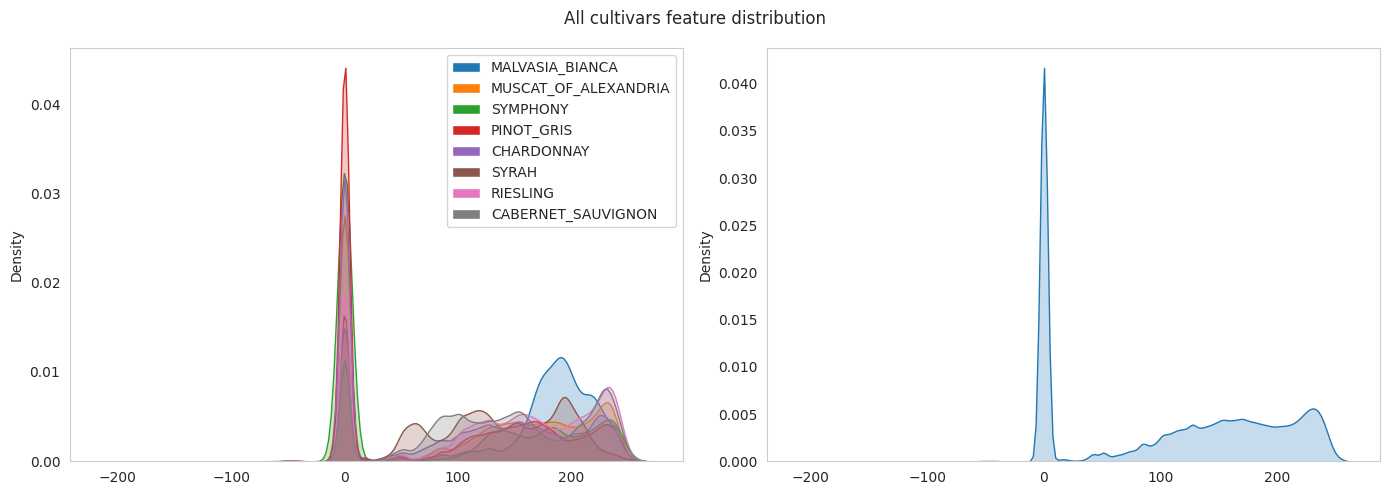

In [111]:
_ = utils.vineyard_data_visulization(block_full_dict, cultivar = cultivars).all_cultivar_image_dist_vis()

## Data ERRor Analysis 

## Data Complexity Measures 